# SI 618 Homework 9

### Overview

The purpose of this homework is to give you more experience with data aggregation in Python, visualization using plotnine, a grammar of graphics implementation almost identical to ggplot in R,  and time-series analysis on a real-world dataset. You will be analyzing Wikipedia page popularity over an 18 month period from July 2015 to December 2016. The dataset is from (https://www.kaggle.com/c/web-traffic-time-series-forecasting/data), but we have provided the CSV (page_views.csv) for you. We have also provided an example document (si618_hw9_solution.html) of the intended solution.

In [149]:
import pandas as pd
import seaborn as sns
import numpy as np
from plotnine import *
from plotnine.stats import *
from mizani.formatters import comma_format
from datetime import datetime

from mizani.breaks import date_breaks
from mizani.formatters import date_format
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Question 0: Loading data and preprocessing (5 points)

Load the data (page_views.csv) and remove NA values. (There are many ways to handle missing data, we choose to remove rows for the purpose of this assignment.) 

In [150]:
views = pd.read_csv("page_views.csv", index_col=0)
views = views.dropna() # default drop rows
views

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,9.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,13.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
Gran_Hermano_VIP_(España)_es.wikipedia.org_all-access_spider,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,71.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0


## Question 1: Average Popularity Analysis (20 points)

#### Question 1-a: Plot the distribution of the average popularity of pages. (10 points)

Hint: You can use stat_ecdf of plotnine to plot a CDF (cumulative distribution function) 

Hint2: You can use the mizani package to format the labels in the figure with commas.

Your plot should look something like this. Note that there is one data point that will be removed while creating this plot. This will happen due to the use of logarithmic scale. You can handle that in different ways. Given that this only affects one row, in this case we chose to ignore it. You can plot this distribution in linear scale first to see why logairthmic scale is needed.

D:\Software\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
D:\Software\anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_ecdf : Removed 1 rows containing non-finite values.


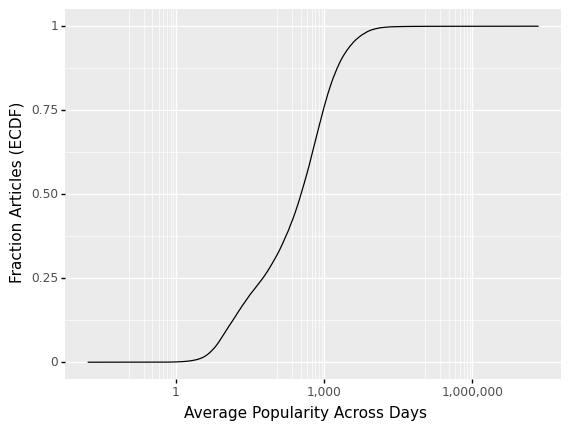

<ggplot: (133763894339)>

In [151]:
avg_pop = pd.DataFrame(views.mean(axis=1)).rename(columns={0: "Avg_popularity"})
ggplot(avg_pop, aes(x="Avg_popularity")) + \
    stat_ecdf() + \
    scale_x_log10(labels = comma_format()) + \
    labs(x='Average Popularity Across Days', y='Fraction Articles (ECDF)')

#### Question 1-b: What are the top-10 and bottom-10 pages with regards to popularity? (10 points)

In [152]:
avg_pop_sorted = avg_pop.sort_values('Avg_popularity', ascending=False)
print(f"Top 10 pages {avg_pop_sorted[:10].astype(int)} \n")
print(f"Bottom 10 pages {avg_pop_sorted[-10:].iloc[::-1]}") # .iloc[::-1] for reverse

Top 10 pages                                                     Avg_popularity
Page                                                              
Main_Page_en.wikipedia.org_all-access_all-agents          21938511
Main_Page_en.wikipedia.org_desktop_all-agents             15953631
Main_Page_en.wikipedia.org_mobile-web_all-agents           5734517
Wikipedia:Hauptseite_de.wikipedia.org_all-acces...         2916244
Special:Search_en.wikipedia.org_all-access_all-...         2371053
Wikipedia:Hauptseite_de.wikipedia.org_mobile-we...         2023071
Заглавная_страница_ru.wikipedia.org_all-access_...         1974580
Special:Search_en.wikipedia.org_desktop_all-agents         1839723
Wikipédia:Accueil_principal_fr.wikipedia.org_al...         1579055
Wikipedia:Portada_es.wikipedia.org_all-access_a...         1366349 

Bottom 10 pages                                                     Avg_popularity
Page                                                              
Special:EditWatchlist_www.media

## Question 2: Day-of-the-week Effect (15 points)

Is there a day-of-the-week effect on Wikipedia? On average, which day sees the most Wikipedia views (total across all articles)? What about the least views?

In [153]:
day_views = views.sum()
weekday_views = pd.DataFrame({
    "weekday": [pd.to_datetime(date).strftime('%A') for date in day_views.index],
    "tot_view": list(day_views)
})
weekday_views.groupby("weekday").mean().astype(int) \
    .sort_values('tot_view', ascending=False)

,tot_view
weekday,
Monday,191948744
Sunday,186714033
Tuesday,184840493
Wednesday,182450695
Thursday,178039318
Saturday,172645250
Friday,172204776


+ There is a day-of-the-week effect on Wikipedia since there are more views in the previous half of a week (Sunday, Monday, Tuesday and Wednesday) while less views in the latter half of a week (Thursday, Friday and Saturday).
+ Monday has the most Wikipedia views on average while the Friday has the least views.

## Question 3: Wikipedia views per day (30  points)

Plot Wikipedia views per day (total across all pages) over time. Then plot the de-seasonified data where the day-of-the-week effects are removed.

Hint: Use mizani package to get the correct formatting for the axis labels

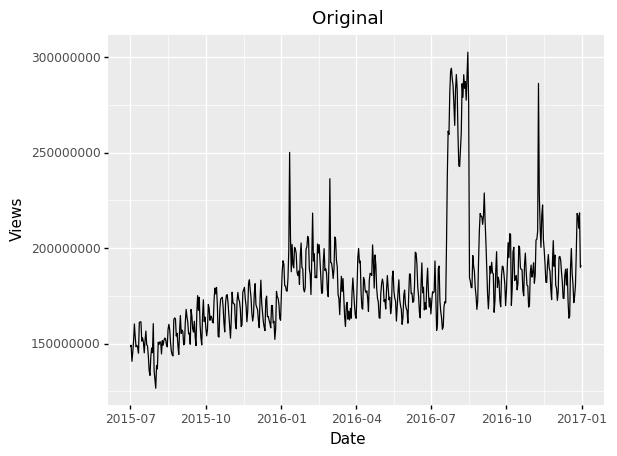

<ggplot: (133768901220)>

In [154]:
day_views_df = pd.DataFrame({
    "date": day_views.index, 
    "day_view": list(day_views)
}) # convert the day_view to a dataframe

# plot the views per day
ggplot(day_views_df, aes('date', 'day_view')) + \
    geom_line(aes(group = 1)) + \
    scale_x_datetime(breaks=date_breaks('3 months'), labels=(date_format('%Y-%m'))) + \
    labs(x='Date', y='Views') + \
    ggtitle('Original')

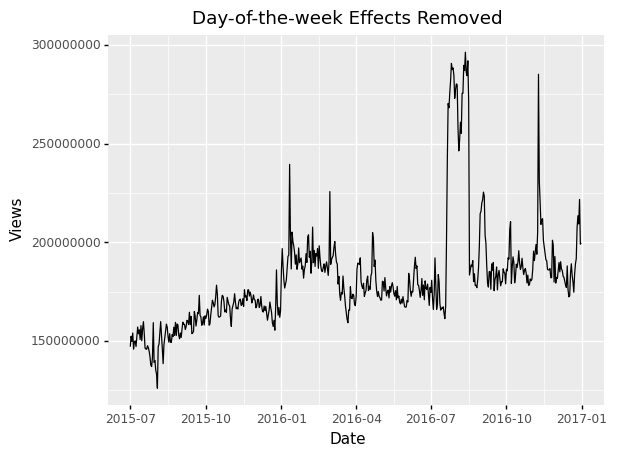

<ggplot: (133767798501)>

In [155]:
# plot the de-seasonified views per day
model = smf.ols('tot_view ~ C(weekday)', data=weekday_views).fit()
day_views_df['day_view_adjusted'] = day_views_df['day_view'].mean() + model.resid
ggplot(day_views_df, aes('date', 'day_view_adjusted')) + \
    geom_line(aes(group = 1)) + \
    scale_x_datetime(breaks=date_breaks('3 months'), labels=(date_format('%Y-%m'))) + \
    labs(x='Date', y='Views') + \
    ggtitle('Day-of-the-week Effects Removed')

## Question 4: Repeat Q3 for the top 50K articles (30 points)

Repeat Q3 for the top 50K articles. For this you will need to first find the top 50K pages and limit your dataset to those. We define these top pages as those with the largest number of overall page views. Next you need to find the day of the week effect for this subset and plot the two time series.

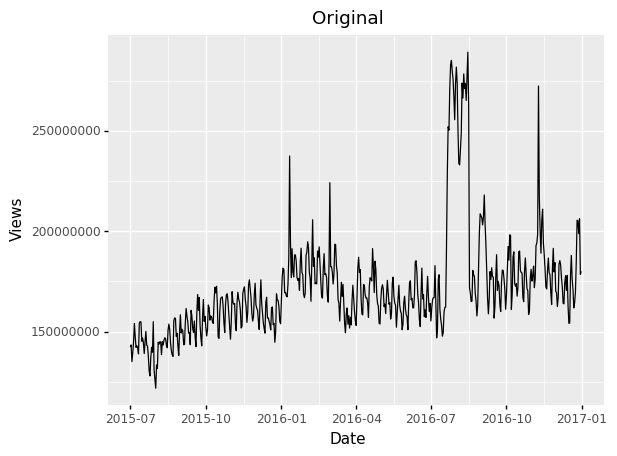

<ggplot: (133769223662)>

In [160]:
# extract the data
views["all"] = views.sum(axis=1)
views_50k = views.sort_values("all", ascending=False)[:50000].drop(columns=["all"])

# data manipulation
day_views_50k = views_50k.sum()
weekday_views_50k = pd.DataFrame({
    "weekday": [pd.to_datetime(date).strftime('%A') for date in day_views_50k.index],
    "tot_view": list(day_views_50k)
})
day_views_50k_df = pd.DataFrame({
    "date": day_views_50k.index, 
    "day_view": list(day_views_50k)
}) # convert the day_view to a dataframe

# plot the views per day for top 50K pages
ggplot(day_views_50k_df, aes('date', 'day_view')) + \
    geom_line(aes(group = 1)) + \
    scale_x_datetime(breaks=date_breaks('3 months'), labels=(date_format('%Y-%m'))) + \
    labs(x='Date', y='Views') + \
    ggtitle('Original')

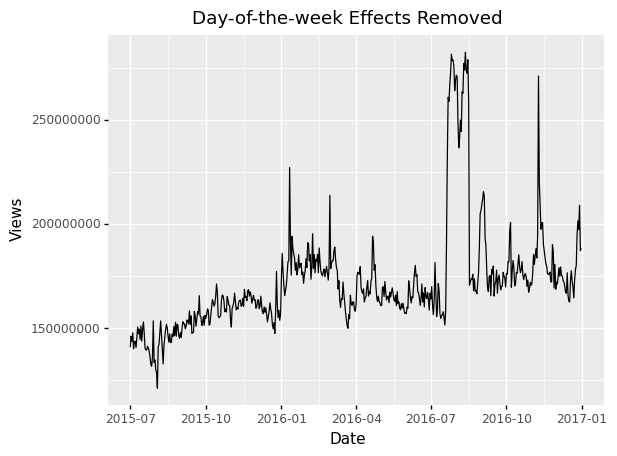

<ggplot: (133770478225)>

In [161]:
# plot the de-seasonified views per day for top 50K pages
model2 = smf.ols('tot_view ~ C(weekday)', data=weekday_views_50k).fit()
day_views_50k_df['day_view_adjusted'] = day_views_50k_df['day_view'].mean() + model2.resid
ggplot(day_views_50k_df, aes('date', 'day_view_adjusted')) + \
    geom_line(aes(group = 1)) + \
    scale_x_datetime(breaks=date_breaks('3 months'), labels=(date_format('%Y-%m'))) + \
    labs(x='Date', y='Views') + \
    ggtitle('Day-of-the-week Effects Removed')

## What to submit

* The jupyter notebook file named 'uniquename_si618_hw9.ipynb'
* The HTML or PDF report generated by your notebook file that should similar to si618_hw9_solution.html